In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:
ozon_df = pd.read_csv('ozon.csv')
ozon_df.head()

,radiation,temperature,wind,ozone
0,190,67,7.4,41
1,118,72,8.0,36
2,149,74,12.6,12
3,313,62,11.5,18
4,299,65,8.6,23


In [29]:
X = ozon_df.drop('ozone', axis=1)
y = ozon_df['ozone']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (88, 3)
X_test shape: (23, 3)
y_train shape: (88,)
y_test shape: (23,)


In [30]:
import warnings

warnings.filterwarnings('ignore')


In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Constants of linear regression
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

# Mean normalaized squared error on train and test
def print_mse(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Train MSE:", mean_squared_error(y_train, y_train_pred))
    print("Test MSE:", mean_squared_error(y_test, y_test_pred)
    )

print_mse(lr, X_train, y_train, X_test, y_test)


Coefficients: [ 0.06339674  1.6229136  -3.45349018]
Intercept: -60.99239108927824
Train MSE: 481.6297884493444
Test MSE: 245.1728987764348


In [32]:
# Define variance from 0 to 50 with step 5
variance = np.arange(0, 50, 5)

# Create gaussian independent 3*size noise with variance from variance array
def create_noise(size, variance):
    return np.random.normal(0, variance, size)

def create_noisy_labels(y, variance):
    return y + create_noise(len(y), variance)

def print_mse_with_noise(model, X_train, y_train, X_test, y_test, variance):
    train_MSE = []
    test_MSE = []
    for var in variance:
        y_train_noisy = create_noisy_labels(y_train, var)
        y_test_noisy = create_noisy_labels(y_test, var)
        model.fit(X_train, y_train_noisy)
        print(f"Variance: {var}")
        print_mse(model, X_train, y_train_noisy, X_test, y_test_noisy)
        train_MSE.append(mean_squared_error(y_train_noisy, model.predict(X_train)))
        test_MSE.append(mean_squared_error(y_test_noisy, model.predict(X_test)))
    return train_MSE, test_MSE

train_MSE, test_MSE = print_mse_with_noise(lr, X_train, y_train, X_test, y_test, variance)


Variance: 0
Train MSE: 481.6297884493444
Test MSE: 245.1728987764348
Variance: 5
Train MSE: 514.2808503747384
Test MSE: 265.61736848055824
Variance: 10
Train MSE: 616.215420307917
Test MSE: 374.79870598621727
Variance: 15
Train MSE: 709.0078114700426
Test MSE: 431.5619837815144
Variance: 20
Train MSE: 675.2764854311309
Test MSE: 538.4922514967617
Variance: 25
Train MSE: 1081.4667437545338
Test MSE: 810.9169035687046
Variance: 30
Train MSE: 1255.7676609375487
Test MSE: 900.1160728110473
Variance: 35
Train MSE: 2079.852377017189
Test MSE: 1783.4879046392753
Variance: 40
Train MSE: 1886.9411151254956
Test MSE: 1791.458456905477
Variance: 45
Train MSE: 2447.650019304004
Test MSE: 2558.450336716733


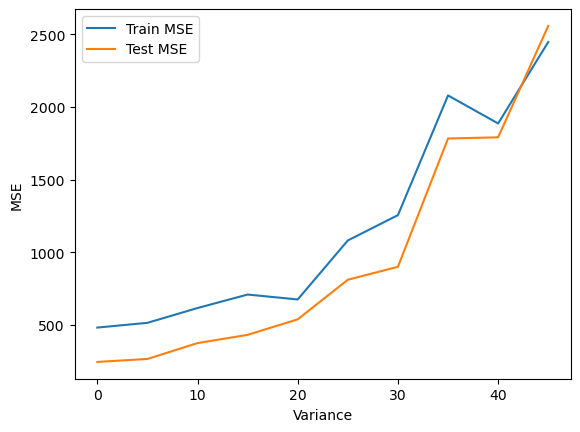

In [33]:
plt.plot(variance, train_MSE, label='Train MSE')
plt.plot(variance, test_MSE, label='Test MSE')
plt.xlabel('Variance')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [8]:
X_train_sq = X_train.copy()
X_test_sq = X_test.copy()
for col in X_train.columns:
    X_train_sq[col + '^2'] = X_train[col] ** 2
    X_test_sq[col + '^2'] = X_test[col] ** 2

lr_sq = LinearRegression()
lr_sq.fit(X_train_sq, y_train)

print_mse(lr_sq, X_train_sq, y_train, X_test_sq, y_test)


Train MSE: 301.0731846497048
Test MSE: 479.9838582344587


As it could've been predited, adding variance to data make it's MSE grow. However, this noise adds some kind of robustness to the model, as it's able to generalize better to unseen data. The reason for this is that the model is not overfitting to the training data, as it's not able to fit the noise.

# Part II

In [35]:
# Load every image from subfolders of 'data' folder
import os
import cv2

def load_images_from_subfolder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images
    
def load_images_from_folder(folder):
    images = []
    for subfolder in os.listdir(folder):
        images.append(load_images_from_subfolder(os.path.join(folder, subfolder)))
    return images

images = load_images_from_folder('surprise videos')
print(len(images))
print(sum(len(subfolder_images) for subfolder_images in images))

30
526


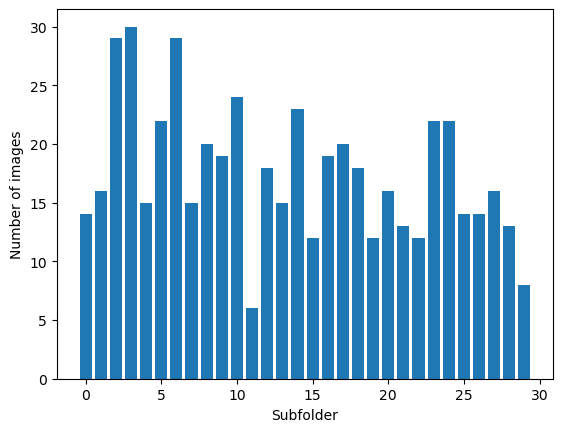

In [36]:
# Plot how many images are in each subfolder
plt.bar(range(len(images)), [len(subfolder) for subfolder in images])
plt.xlabel('Subfolder')
plt.ylabel('Number of images')
plt.show()


14
list index out of range


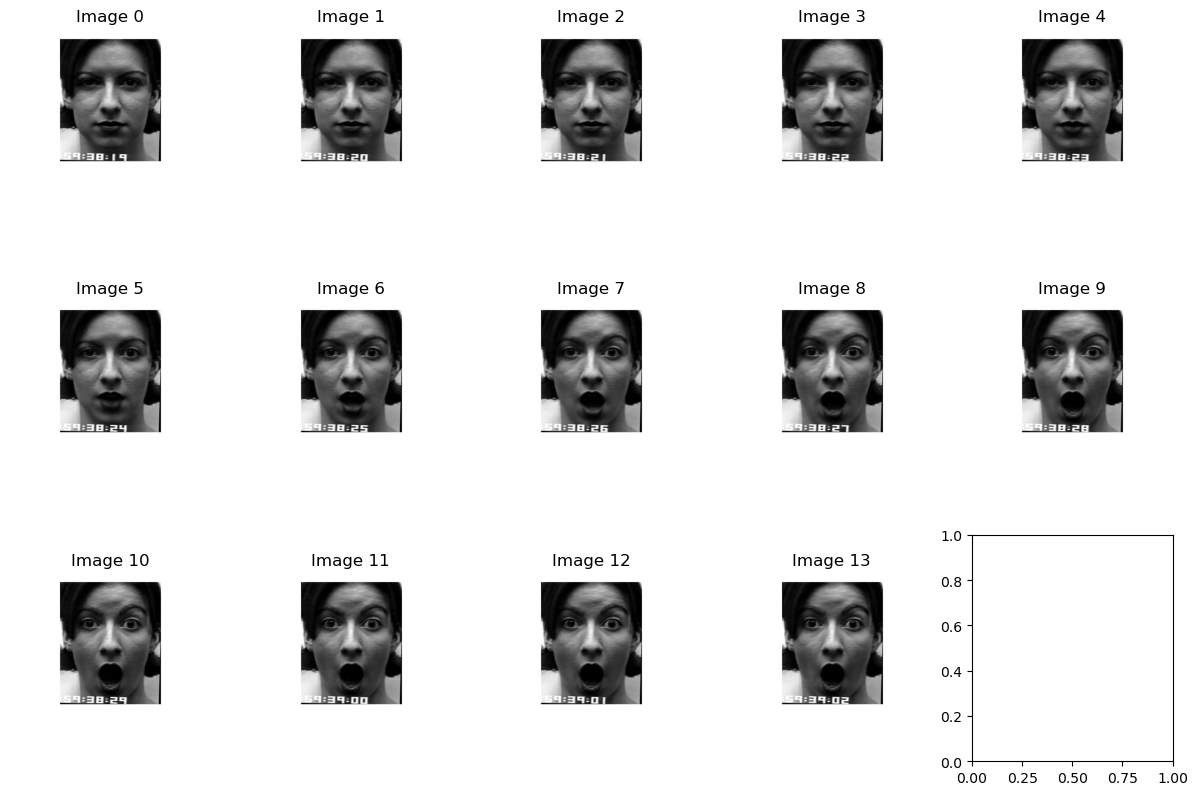

In [37]:
# Plot all images from the first subfolder
size_of_first_sunfolder = len(images[0])
print(size_of_first_sunfolder)
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
for i in range(3):
    for j in range(5):
        try:
            ax[i, j].imshow(cv2.cvtColor(images[0][i * 5 + j], cv2.COLOR_BGR2RGB))
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Image {i * 5 + j}')
        except Exception as e:
            print(e)
plt.show()

In [38]:
y = []
for i in range(len(images)):
    label = []
    offset = 1/(len(images[i])-1)
    for j in range(len(images[i])):
        label.append(offset * j)
    y.append(label)
print(f"First subfolder labels: {y[0]}")
y = np.concatenate(y)
print(f"Labels shape: {y.shape}")

First subfolder labels: [0.0, 0.07692307692307693, 0.15384615384615385, 0.23076923076923078, 0.3076923076923077, 0.38461538461538464, 0.46153846153846156, 0.5384615384615385, 0.6153846153846154, 0.6923076923076923, 0.7692307692307693, 0.8461538461538463, 0.9230769230769231, 1.0]
Labels shape: (526,)


In [39]:
x = np.concatenate(images)
print(f"Images shape: {x.shape}")

# Gray scale every image
x_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in x])
print(f"Gray images shape: {x_gray.shape}")

# Vectorize every image
x_vectorized = x_gray.reshape(x_gray.shape[0], -1)
print(f"Vectorized images shape: {x_vectorized.shape}")

Images shape: (526, 900, 1200, 3)
Gray images shape: (526, 900, 1200)
Vectorized images shape: (526, 1080000)


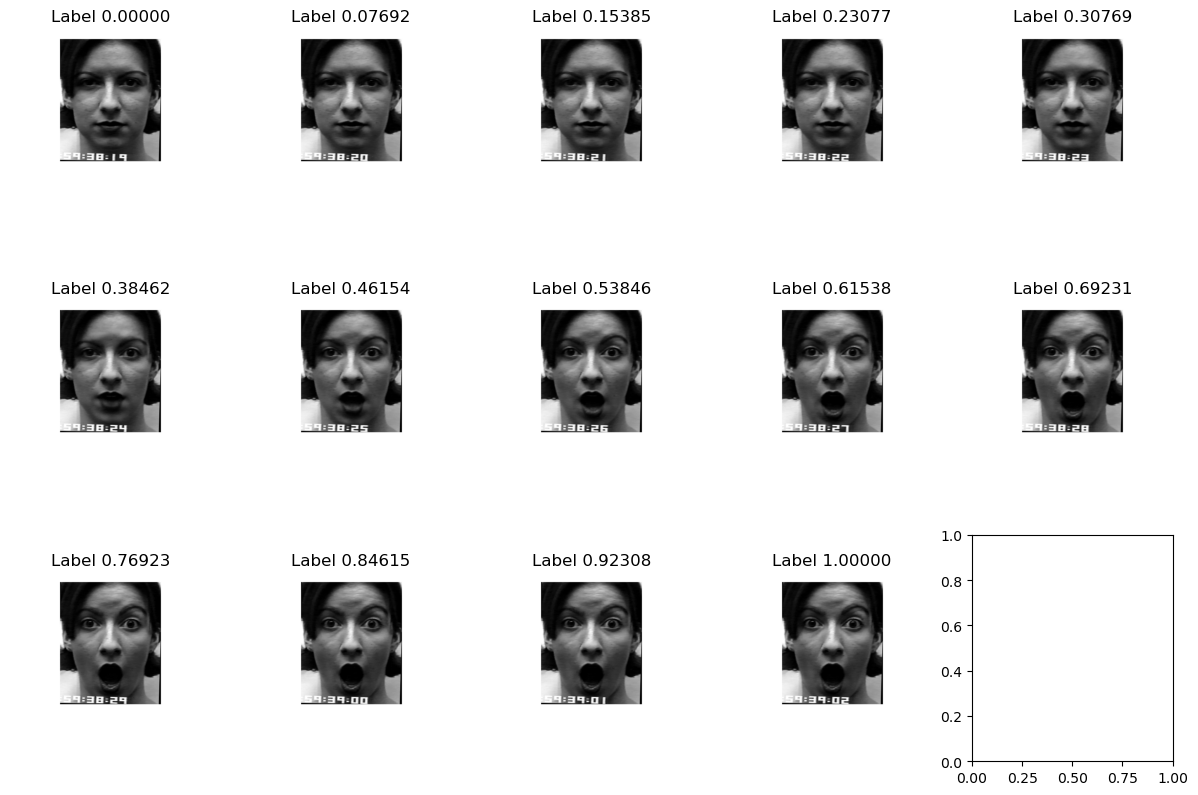

In [40]:
size_of_first_sunfolder = len(images[0])
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
for i in range(3):
    for j in range(5):
        try:
            if i * 5 + j < 14:
                ax[i, j].imshow(cv2.cvtColor(x_gray[i * 5 + j], cv2.COLOR_BGR2RGB))
                ax[i, j].axis('off')
                ax[i, j].set_title(f'Label {y[i * 5 + j]:.5f}')
        except Exception as e:
            print(e)
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.4, random_state=42)

In [16]:
# Train linear regression on images
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

It took 5 minutes to train the model. I'd be glad to not have to wait that long to train linear regression models.

In [17]:
# Print MSE on train and test
print_mse(lr, X_train, y_train, X_test, y_test)

Train MSE: 7.558854200741894e-28
Test MSE: 0.003479575949955716


It 

In [18]:
y_train_pred = lr.predict(X_train)

In [19]:
print(f"First subfolder labels{y_train_pred[:size_of_first_sunfolder]}")
print(f"First subfolder true labels: {y_train[:size_of_first_sunfolder]}")
MSE_errror = (y_train_pred[:size_of_first_sunfolder]- y_train[:size_of_first_sunfolder])**2
print(f"First subfolder MSE error: {MSE_errror}")

First subfolder labels[0.92857143 0.94736842 0.09090909 0.33333333 1.         0.16666667
 0.75862069 0.23809524 0.57142857 0.67857143 0.21428571 0.92857143
 0.35294118 0.90909091]
First subfolder true labels: [0.92857143 0.94736842 0.09090909 0.33333333 1.         0.16666667
 0.75862069 0.23809524 0.57142857 0.67857143 0.21428571 0.92857143
 0.35294118 0.90909091]
First subfolder MSE error: [1.87477725e-29 8.28796989e-29 4.33334237e-30 1.12415760e-28
 1.18452395e-27 7.26338286e-28 1.23259516e-30 9.65399348e-29
 1.23259516e-30 5.43574468e-30 1.26360264e-28 1.46444631e-28
 5.43574468e-30 3.56220003e-30]


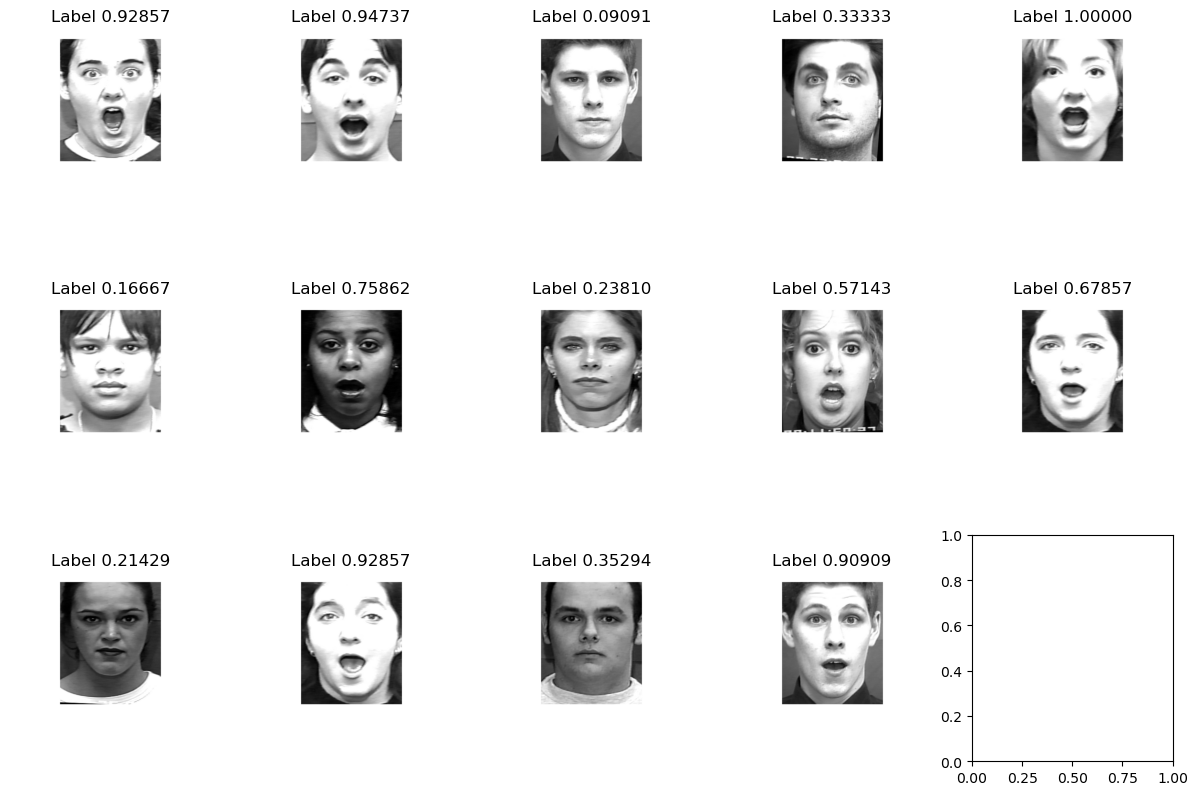

In [42]:
size_of_first_sunfolder = len(images[0])
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
for i in range(3):
    for j in range(5):
        try:
            if i * 5 + j < 14:
                # plot x_train image
                ax[i, j].imshow(cv2.cvtColor(X_train[i * 5 + j].reshape(900, 1200), cv2.COLOR_BGR2RGB))
                ax[i, j].axis('off')
                ax[i, j].set_title(f'Label {y_train[i * 5 + j]:.5f}')
        except Exception as e:
            print(e)
plt.show()

In [43]:
def crop_white(gray_image):
    _, threshold = cv2.threshold(gray_image, 253, 255, cv2.THRESH_BINARY)
    inverted_threshold = cv2.bitwise_not(threshold)
    contours, _ = cv2.findContours(inverted_threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        cropped_image = gray_image[y:y+h, x:x+w]
        return cropped_image
    
    return gray_image

def fit_size(images):
    min_shape_x = 0
    min_shape_y = 0
    for image in images:
        if image.shape[0] > min_shape_y:
            min_shape_y = image.shape[0]
        if image.shape[1] > min_shape_x:
            min_shape_x = image.shape[1]
    print(f"Min shape: {min_shape_x}x{min_shape_y}")
    return np.array([cv2.resize(img, (min_shape_x, min_shape_y)) for img in images])

def mask_images(images):
    masked_images = []
    for gray in images:
        # Mask the central part of the image
        mask = np.zeros(gray.shape, np.uint8)
        shape = gray.shape
        center = (shape[1] // 2, shape[0] // 2)
        radius_x = math.floor(shape[1] / 2.3)
        radius_y = math.floor(shape[0] / 1.5)

        mask = cv2.ellipse(mask, center, (radius_x, radius_y), 0, 0, 360, 255, -1)
        masked_img = cv2.bitwise_and(gray, gray, mask=mask)

        masked_images.append(masked_img)
    
    return masked_images

def reshape_images(images, shape):
    return np.array([cv2.resize(img, shape) for img in images])

cropped_images = [crop_white(img) for img in x_gray]
fitted_images = fit_size(cropped_images)
masked_images = mask_images(fitted_images)

print(f"Length of cropped images: {len(cropped_images)}")
print(f"Shape shape of cropped images: {cropped_images[0].shape}")

# Resize images to 1/4 of the original size
resized_images = reshape_images(masked_images, (cropped_images[0].shape[1] // 4, cropped_images[0].shape[0] // 4))

print(f"Shape shape of resized images: {resized_images[0].shape}")


Min shape: 602x728
Length of cropped images: 526
Shape shape of cropped images: (728, 602)
Shape shape of resized images: (182, 150)


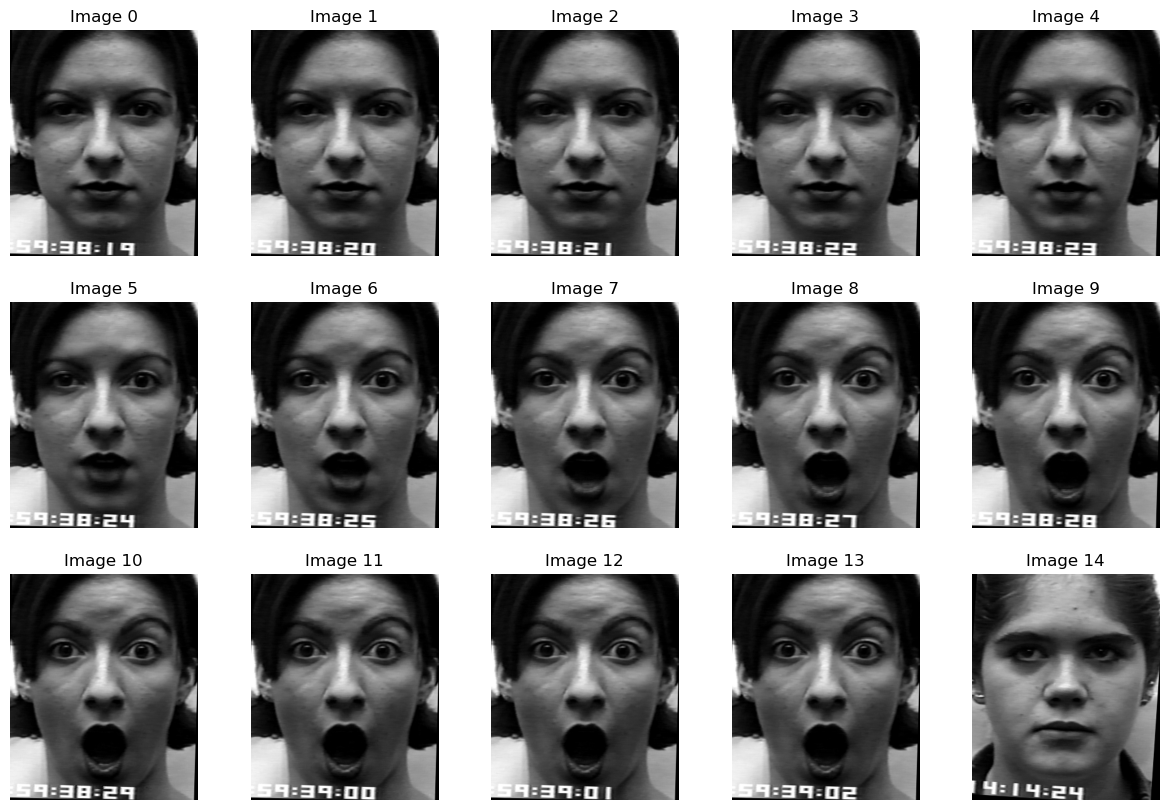

In [45]:
# Plot cropped images
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
for i in range(3):
    for j in range(5):
        try:
            ax[i, j].imshow(cv2.cvtColor(cropped_images[i * 5 + j], cv2.COLOR_BGR2RGB))
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Image {i * 5 + j}')
        except Exception as e:
            print(e)

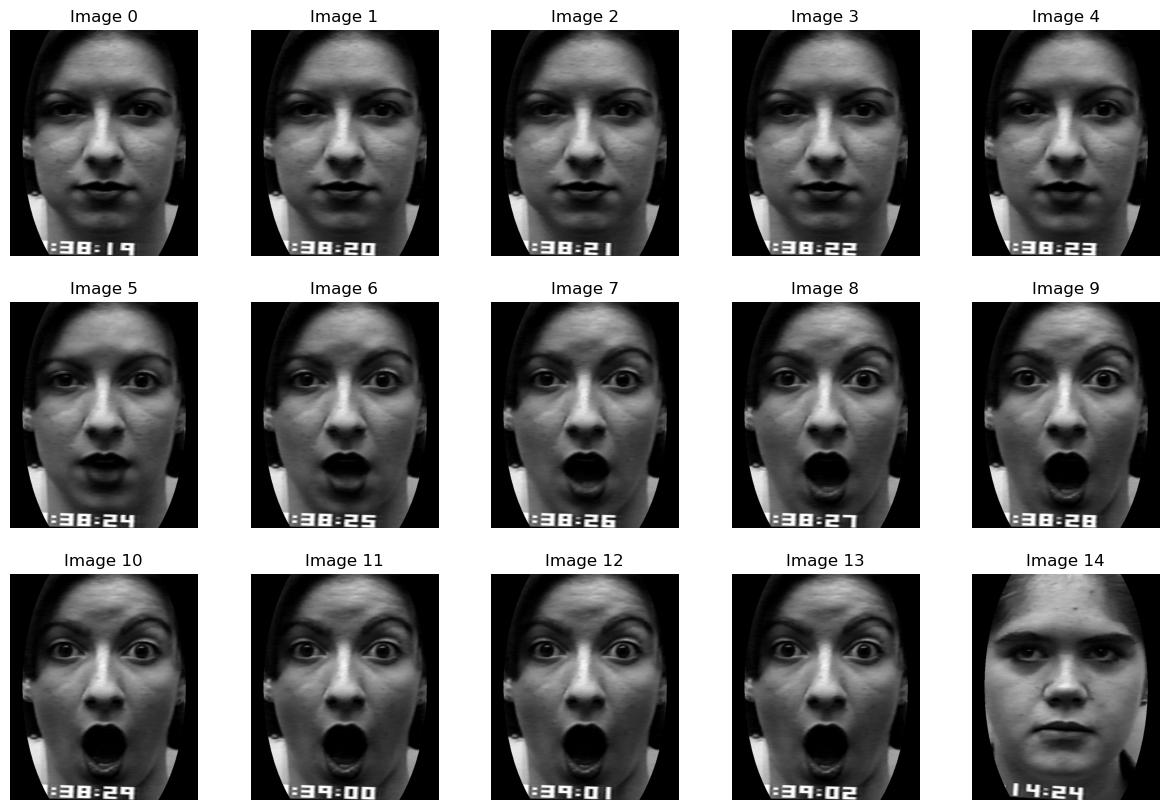

In [46]:
# Plot masked images
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
for i in range(3):
    for j in range(5):
        try:
            ax[i, j].imshow(cv2.cvtColor(masked_images[i * 5 + j], cv2.COLOR_BGR2RGB))
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Image {i * 5 + j}')
        except Exception as e:
            print(e)

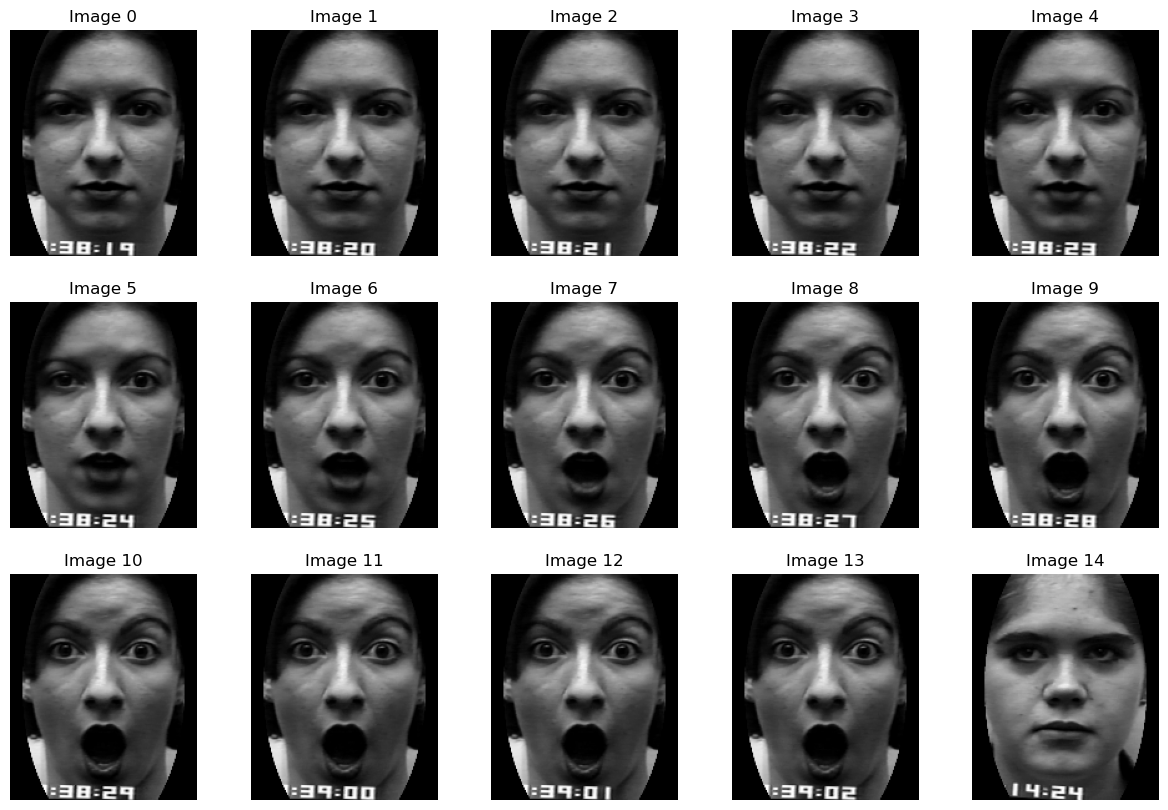

In [47]:
# Plot resized images
fig, ax = plt.subplots(3, 5, figsize=(15, 10))
for i in range(3):
    for j in range(5):
        try:
            ax[i, j].imshow(cv2.cvtColor(resized_images[i * 5 + j], cv2.COLOR_BGR2RGB))
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Image {i * 5 + j}')
        except Exception as e:
            print(e)

In [48]:
lr2 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(resized_images.reshape(resized_images.shape[0], -1), y, test_size=0.4, random_state=42)
lr2.fit(X_train, y_train)
print_mse(lr2, X_train, y_train, X_test, y_test)


Train MSE: 0.0980557457482855
Test MSE: 4.4923671697724e+20


Error for train is decreased, as it's simpler to predict (0,0,0) for outer pixels for faces. However, the error for test is increased, as the model is not able to generalize well to unseen data.

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
print_mse(lr_pca, X_train_pca, y_train, X_test_pca, y_test)


Train MSE: 0.052568829895532805
Test MSE: 0.056840817206284935


The error has significantly decreased for test data, as the model is able to generalize better to unseen data. The reason for this is that the model has to deal with an smaller manifold, as the data is less complex. Thus we can conclude that using PCA is a good strategy to reduce the complexity of the data, as it makes the model generalize better to unseen data.